In [1]:
%matplotlib notebook

In [2]:
# Dependencies

import pandas as pd
import json
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress
import numpy as np
  

In [3]:
#Readiing csv files
income_raw_data = pd.read_csv("../Resources/SAINC1 Personal Income Summary.csv")
expenditure_raw_data = pd.read_csv("../Resources/SAEXP1__ALL_AREAS_1997_2019.csv")
states_list = pd.read_csv("../Resources/states.csv")

income_raw_data.head()

,GeoFips,GeoName,LineCode,Description,1929,1930,1931,1932,1933,1934,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,United States,1.0,Personal income (millions of dollars),85151,76394,65531,50162,47114,53967,...,12541995.0,13315478.0,13998383.0,14175503.0,14982715.0,15717140.0,16151881.0,16937582.0,17839255.0,18542262.0
1,0,United States,2.0,Population (persons) 1/,121769000,123075000,124038000,124839000,125580000,126372000,...,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
2,0,United States,3.0,Per capita personal income (dollars) 2/,699,621,528,402,375,427,...,40547.0,42739.0,44605.0,44860.0,47071.0,49019.0,50015.0,52118.0,54606.0,56490.0
3,1000,Alabama,1.0,Personal income (millions of dollars),843.2,697.5,583.7,421.9,435.6,556.3,...,161516.6,167942.8,172804.1,174415.4,180457.7,188711.4,192281.9,199999.8,208752.7,216449.0
4,1000,Alabama,2.0,Population (persons) 1/,2644000,2647000,2649000,2653000,2661000,2685000,...,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0


In [4]:
#Analyse income_raw 
#Create dataframe from 1997 to 2019
#Drop irrelevant columns, 

years_dropped = list(range(1929,1997))
income_1997_2019 = income_raw_data

for year in years_dropped:
    income_1997_2019 = income_1997_2019.drop(columns = str(year))

income_df = income_1997_2019.drop(columns = ["GeoFips"])
income_df.head()

,GeoName,LineCode,Description,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,1.0,Personal income (millions of dollars),7086935.0,7601594.0,8001563.0,8650325.0,9001839.0,9155663.0,9480901.0,...,12541995.0,13315478.0,13998383.0,14175503.0,14982715.0,15717140.0,16151881.0,16937582.0,17839255.0,18542262.0
1,United States,2.0,Population (persons) 1/,272646925.0,275854104.0,279040168.0,282162411.0,284968955.0,287625193.0,290107933.0,...,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
2,United States,3.0,Per capita personal income (dollars) 2/,25993.0,27557.0,28675.0,30657.0,31589.0,31832.0,32681.0,...,40547.0,42739.0,44605.0,44860.0,47071.0,49019.0,50015.0,52118.0,54606.0,56490.0
3,Alabama,1.0,Personal income (millions of dollars),93981.4,99953.3,103453.1,108355.1,112154.9,115191.8,120211.1,...,161516.6,167942.8,172804.1,174415.4,180457.7,188711.4,192281.9,199999.8,208752.7,216449.0
4,Alabama,2.0,Population (persons) 1/,4367935.0,4404701.0,4430141.0,4452173.0,4467634.0,4480089.0,4503491.0,...,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0


In [5]:
#Create population dataframe
population = income_df.loc[income_df["Description"] == "Population (persons) 1/"]
population.set_index(["GeoName"], inplace = True)
population.head()

,LineCode,Description,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
GeoName,,,,,,,,,,,,,,,,,,,,,
United States,2.0,Population (persons) 1/,272646925.0,275854104.0,279040168.0,282162411.0,284968955.0,287625193.0,290107933.0,292805298.0,...,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
Alabama,2.0,Population (persons) 1/,4367935.0,4404701.0,4430141.0,4452173.0,4467634.0,4480089.0,4503491.0,4530729.0,...,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
Alaska,2.0,Population (persons) 1/,612968.0,619932.0,624779.0,627963.0,633714.0,642337.0,648414.0,659286.0,...,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
Arizona,2.0,Population (persons) 1/,4736990.0,4883342.0,5023823.0,5160586.0,5273477.0,5396255.0,5510364.0,5652404.0,...,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
Arkansas,2.0,Population (persons) 1/,2601090.0,2626289.0,2651860.0,2678588.0,2691571.0,2705927.0,2724816.0,2749686.0,...,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0


In [6]:
#Analyse expenditure_raw and drop irrelevant headings
expenditure_df = expenditure_raw_data.drop(columns = ["GeoFIPS", "Region", "TableName", "IndustryClassification"])

#set multi index on GeoName and Description
expenditure_df.set_index(["GeoName", "Description"], inplace = True)

#Drop rows with with all NaN values
expenditure_df.dropna(axis=0, how='all', inplace=True)

expenditure_df

LineCode  \
GeoName       Description                                                    
United States Personal consumption expenditures                        1.0   
               Goods                                                   2.0   
                Durable goods                                          3.0   
                 Motor vehicles and parts                              4.0   
                 Furnishings and durable household equipment           5.0   
...                                                                    ...   
Far West         Financial services and insurance                     20.0   
                 Other services                                       21.0   
                Final consumption expenditures of nonprofit i...      22.0   
                 Gross output of nonprofit institutions               23.0   
                 Less: Receipts from sales of goods and servi...      24.0   

                                                                                         Unit  \
GeoName       Description                                                                       
United States Personal consumption expenditures                   Millions of current dollars   
               Goods                                              Millions of current dollars   
                Durable goods                                     Millions of current dollars   
                 Motor vehicles and parts                         Millions of current dollars   
                 Furnishings and durable household equipment      Millions of current dollars   
...                                                                                       ...   
Far West         Financial services and insurance                 Millions of current dollars   
                 Other services                                   Millions of current dollars   
                Final consumption expenditures of nonprofit i...  Millions of current dollars   
                 Gross output of nonprofit institutions           Millions of current dollars   
                 Less: Receipts from sales of goods and servi...  Millions of current dollars   

                                                                       1997  \
GeoName       Description                                                     
United States Personal consumption expenditures                   5534091.8   
               Goods                                              2003807.2   
                Durable goods                                      715529.6   
                 Motor vehicles and parts                          293082.5   
                 Furnishings and durable household equipment       160490.2   
...                                                                     ...   
Far West         Financial services and insurance                   83502.2   
                 Other services                                     73099.5   
                Final consumption expenditures of nonprofit i...    15583.2   
                 Gross output of nonprofit institutions             79226.1   
                 Less: Receipts from sales of goods and servi...    63642.9   

                                                                       1998  \
GeoName       Description                                                     
United States Personal consumption expenditures                   5874285.0   
               Goods                                              2105476.2   
                Durable goods                                      779293.4   
                 Motor vehicles and parts                          320204.7   
                 Furnishings and durable household equipment       173579.1   
...                                                                     ...   
Far West         Financial services and insurance                   91262.2   
                 Other services                   

In [7]:
#Change expenditure dataframe to be in per capital values

In [8]:
#Creating empty description series in database for per capita dataframe
expenditure_new = expenditure_df[['LineCode', 'Unit']]

expenditure_new

LineCode  \
GeoName       Description                                                    
United States Personal consumption expenditures                        1.0   
               Goods                                                   2.0   
                Durable goods                                          3.0   
                 Motor vehicles and parts                              4.0   
                 Furnishings and durable household equipment           5.0   
...                                                                    ...   
Far West         Financial services and insurance                     20.0   
                 Other services                                       21.0   
                Final consumption expenditures of nonprofit i...      22.0   
                 Gross output of nonprofit institutions               23.0   
                 Less: Receipts from sales of goods and servi...      24.0   

                                                                                         Unit  
GeoName       Description                                                                      
United States Personal consumption expenditures                   Millions of current dollars  
               Goods                                              Millions of current dollars  
                Durable goods                                     Millions of current dollars  
                 Motor vehicles and parts                         Millions of current dollars  
                 Furnishings and durable household equipment      Millions of current dollars  
...                                                                                       ...  
Far West         Financial services and insurance                 Millions of current dollars  
                 Other services                                   Millions of current dollars  
                Final consumption expenditures of nonprofit i...  Millions of current dollars  
                 Gross output of nonprofit institutions           Millions of current dollars  
                 Less: Receipts from sales of goods and servi...  Millions of current dollars  

[1440 rows x 2 columns]

In [9]:
expenditure_df.index.values

array([('United States', 'Personal consumption expenditures'),
       ('United States', ' Goods'), ('United States', '  Durable goods'),
       ...,
       ('Far West', '  Final consumption expenditures of nonprofit institutions serving households (NPISHs)'),
       ('Far West', '   Gross output of nonprofit institutions'),
       ('Far West', '   Less: Receipts from sales of goods and services by nonprofit institutions')],
      dtype=object)

In [10]:
#Changing Description series to report correct units i.e. per Capita
#Changing Units in the description
#Calculating the per capita data

for year in list(range(1997,2020)):
    expenditure_new[str(year)]=None   #Creates empty columns of years range
    
    for indx in expenditure_df.index.values:
       
        expenditure_new[str(year)].loc[(indx)] = expenditure_df.loc[(indx)][str(year)] * 1000000 /\
        population.loc[indx[0]][str(year)]
        

        
expenditure_new

<ipython-input-10-3ad6c40ab6bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenditure_new[str(year)]=None   #Creates empty columns of years range
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-10-3ad6c40ab6bb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

LineCode  \
GeoName       Description                                                    
United States Personal consumption expenditures                        1.0   
               Goods                                                   2.0   
                Durable goods                                          3.0   
                 Motor vehicles and parts                              4.0   
                 Furnishings and durable household equipment           5.0   
...                                                                    ...   
Far West         Financial services and insurance                     20.0   
                 Other services                                       21.0   
                Final consumption expenditures of nonprofit i...      22.0   
                 Gross output of nonprofit institutions               23.0   
                 Less: Receipts from sales of goods and servi...      24.0   

                                                                                         Unit  \
GeoName       Description                                                                       
United States Personal consumption expenditures                   Millions of current dollars   
               Goods                                              Millions of current dollars   
                Durable goods                                     Millions of current dollars   
                 Motor vehicles and parts                         Millions of current dollars   
                 Furnishings and durable household equipment      Millions of current dollars   
...                                                                                       ...   
Far West         Financial services and insurance                 Millions of current dollars   
                 Other services                                   Millions of current dollars   
                Final consumption expenditures of nonprofit i...  Millions of current dollars   
                 Gross output of nonprofit institutions           Millions of current dollars   
                 Less: Receipts from sales of goods and servi...  Millions of current dollars   

                                                                     1997  \
GeoName       Description                                                   
United States Personal consumption expenditures                   20297.6   
               Goods                                              7349.46   
                Durable goods                                     2624.38   
                 Motor vehicles and parts                         1074.95   
                 Furnishings and durable household equipment      588.637   
...                                                                   ...   
Far West         Financial services and insurance                 1853.39   
                 Other services                                   1622.49   
                Final consumption expenditures of nonprofit i...   345.88   
                 Gross output of nonprofit institutions           1758.48   
                 Less: Receipts from sales of goods and servi...   1412.6   

                                                                     1998  \
GeoName       Description                                                   
United States Personal consumption expenditures                   21294.9   
               Goods                                              7632.57   
                Durable goods                                     2825.02   
                 Motor vehicles and parts                         1160.78   
                 Furnishings and durable household equipment      629.242   
...                                                                   ...   
Far West         Financial services and insurance                 1992.71   
                 Other services                                   1729.52   
                F

In [11]:
# Including Units in the description to show USD per Capita

expenditure_capita = expenditure_new.reset_index(level=['Description','GeoName'])
expenditure_capita.head()

,GeoName,Description,LineCode,Unit,1997,1998,1999,2000,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,Personal consumption expenditures,1.0,Millions of current dollars,20297.6,21294.9,22490.1,23952.9,24781.2,25513.9,...,32902.5,34123.8,35044.1,35789.7,37118.3,38330.7,39520.9,41027.7,42802.1,44276.4
1,United States,Goods,2.0,Millions of current dollars,7349.46,7632.57,8183.91,8681.64,8849.51,9020.58,...,10699.1,11261.3,11563.1,11778.9,12111.2,12212.3,12359.3,12816.9,13350.6,13712.1
2,United States,Durable goods,3.0,Millions of current dollars,2624.38,2825.02,3066.11,3234.21,3303.92,3425.88,...,3391.17,3509.79,3645.98,3764.04,3902.2,4078.17,4181.01,4340.74,4535.07,4674.49
3,United States,Motor vehicles and parts,4.0,Millions of current dollars,1074.95,1160.78,1256.92,1287.3,1345.02,1395.38,...,1113.62,1172.11,1263.76,1321.33,1388.6,1482.51,1503.54,1549.74,1601.61,1589.83
4,United States,Furnishings and durable household equipment,5.0,Millions of current dollars,588.637,629.242,685.152,737.539,754.258,785.287,...,778.879,792.349,809.155,834.161,867.627,917.615,957.967,999.26,1050.93,1088.96


In [12]:
# Including Units in the description to show USD per Capita
j=0
for indx in expenditure_df.index.values:
    expenditure_capita.iloc[j,1] = f'{expenditure_capita.iloc[j,1]} (USD/Capita)'
    j += 1
expenditure_capita

expenditure_capita = expenditure_capita.drop(columns = 'Unit')
expenditure_capita

,GeoName,Description,LineCode,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,Personal consumption expenditures (USD/Capita),1.0,20297.6,21294.9,22490.1,23952.9,24781.2,25513.9,26602.7,...,32902.5,34123.8,35044.1,35789.7,37118.3,38330.7,39520.9,41027.7,42802.1,44276.4
1,United States,Goods (USD/Capita),2.0,7349.46,7632.57,8183.91,8681.64,8849.51,9020.58,9365.99,...,10699.1,11261.3,11563.1,11778.9,12111.2,12212.3,12359.3,12816.9,13350.6,13712.1
2,United States,Durable goods (USD/Capita),3.0,2624.38,2825.02,3066.11,3234.21,3303.92,3425.88,3508.35,...,3391.17,3509.79,3645.98,3764.04,3902.2,4078.17,4181.01,4340.74,4535.07,4674.49
3,United States,Motor vehicles and parts (USD/Capita),4.0,1074.95,1160.78,1256.92,1287.3,1345.02,1395.38,1384.03,...,1113.62,1172.11,1263.76,1321.33,1388.6,1482.51,1503.54,1549.74,1601.61,1589.83
4,United States,Furnishings and durable household equipment...,5.0,588.637,629.242,685.152,737.539,754.258,785.287,810.598,...,778.879,792.349,809.155,834.161,867.627,917.615,957.967,999.26,1050.93,1088.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,Far West,Financial services and insurance (USD/Capita),20.0,1853.39,1992.71,2085.03,2252.37,2144.81,2142.12,2209.19,...,2520.21,2624.67,2673.46,2788.05,2932.83,3082.8,3168.35,3354.79,3564.03,3724.89
1436,Far West,Other services (USD/Capita),21.0,1622.49,1729.52,1864.16,2029.49,2150.56,2201.98,2314.68,...,2739.01,2815.27,2906.32,2895.45,3028.85,3135.62,3277.7,3446.55,3650.25,3902.38
1437,Far West,Final consumption expenditures of nonprofit ...,22.0,345.88,371.645,424.169,497.631,575.521,669.898,660.462,...,958.324,1019.72,1136.67,1187.73,1223.52,1298.72,1413.25,1483.41,1544.19,1560.22
1438,Far West,Gross output of nonprofit institutions (USD...,23.0,1758.48,1824.32,1934.83,2094.59,2282.38,2510.99,2582.47,...,3753.88,3951.15,4249.1,4359.23,4491.88,4758.69,5035.09,5243.71,5499.22,5747.72


In [13]:
    
# Creating empty dataframe in order to set headings


In [14]:
#Convert Millions of Dollars in expenditure_df to USD per Capita


In [15]:
#Analyze states
states_list.head()

,State,Code
0,United States,US
1,Alabama,AL
2,Alaska,AK
3,Arizona,AZ
4,Arkansas,AR


In [16]:
#merge income and expenditure dataframes and rename Geoname to State
income_expend = pd.merge( income_df, expenditure_capita, how='outer')
income_expend = income_expend.rename(columns = {'GeoName':'State'})
income_expend

,State,LineCode,Description,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,1.0,Personal income (millions of dollars),7.086935e+06,7.601594e+06,8.001563e+06,8.650325e+06,9.001839e+06,9.155663e+06,9.480901e+06,...,1.254200e+07,1.331548e+07,1.399838e+07,1.417550e+07,1.498272e+07,1.571714e+07,1.615188e+07,1.693758e+07,1.783926e+07,1.854226e+07
1,United States,2.0,Population (persons) 1/,2.726469e+08,2.758541e+08,2.790402e+08,2.821624e+08,2.849690e+08,2.876252e+08,2.901079e+08,...,3.093217e+08,3.115569e+08,3.138310e+08,3.159937e+08,3.183010e+08,3.206352e+08,3.229413e+08,3.249855e+08,3.266875e+08,3.282395e+08
2,United States,3.0,Per capita personal income (dollars) 2/,2.599300e+04,2.755700e+04,2.867500e+04,3.065700e+04,3.158900e+04,3.183200e+04,3.268100e+04,...,4.054700e+04,4.273900e+04,4.460500e+04,4.486000e+04,4.707100e+04,4.901900e+04,5.001500e+04,5.211800e+04,5.460600e+04,5.649000e+04
3,Alabama,1.0,Personal income (millions of dollars),9.398140e+04,9.995330e+04,1.034531e+05,1.083551e+05,1.121549e+05,1.151918e+05,1.202111e+05,...,1.615166e+05,1.679428e+05,1.728041e+05,1.744154e+05,1.804577e+05,1.887114e+05,1.922819e+05,1.999998e+05,2.087527e+05,2.164490e+05
4,Alabama,2.0,Population (persons) 1/,4.367935e+06,4.404701e+06,4.430141e+06,4.452173e+06,4.467634e+06,4.480089e+06,4.503491e+06,...,4.785437e+06,4.799069e+06,4.815588e+06,4.830081e+06,4.841799e+06,4.852347e+06,4.863525e+06,4.874486e+06,4.887681e+06,4.903185e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,Far West,20.0,Financial services and insurance (USD/Capita),1.853389e+03,1.992710e+03,2.085026e+03,2.252368e+03,2.144813e+03,2.142124e+03,2.209193e+03,...,2.520206e+03,2.624670e+03,2.673463e+03,2.788046e+03,2.932828e+03,3.082796e+03,3.168345e+03,3.354788e+03,3.564027e+03,3.724891e+03
1623,Far West,21.0,Other services (USD/Capita),1.622494e+03,1.729524e+03,1.864164e+03,2.029485e+03,2.150561e+03,2.201982e+03,2.314681e+03,...,2.739008e+03,2.815269e+03,2.906317e+03,2.895446e+03,3.028847e+03,3.135621e+03,3.277700e+03,3.446553e+03,3.650252e+03,3.902380e+03
1624,Far West,22.0,Final consumption expenditures of nonprofit ...,3.458800e+02,3.716447e+02,4.241691e+02,4.976306e+02,5.755214e+02,6.698979e+02,6.604623e+02,...,9.583239e+02,1.019723e+03,1.136673e+03,1.187734e+03,1.223522e+03,1.298720e+03,1.413253e+03,1.483410e+03,1.544187e+03,1.560223e+03
1625,Far West,23.0,Gross output of nonprofit institutions (USD...,1.758478e+03,1.824320e+03,1.934827e+03,2.094594e+03,2.282381e+03,2.510985e+03,2.582468e+03,...,3.753879e+03,3.951149e+03,4.249104e+03,4.359228e+03,4.491878e+03,4.758695e+03,5.035092e+03,5.243705e+03,5.499218e+03,5.747724e+03


In [17]:
#merge dataframes with states list to get rid of all rows that are not states
combined_df = pd.merge( states_list, income_expend, how='left', on="State")

#Strip white spaces in Description for easy referencing
combined_df["Description"]=combined_df["Description"].str.strip()
combined_df.head(20)

,State,Code,LineCode,Description,1997,1998,1999,2000,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,US,1.0,Personal income (millions of dollars),7.086935e+06,7.601594e+06,8.001563e+06,8.650325e+06,9.001839e+06,9.155663e+06,...,1.254200e+07,1.331548e+07,1.399838e+07,1.417550e+07,1.498272e+07,1.571714e+07,1.615188e+07,1.693758e+07,1.783926e+07,1.854226e+07
1,United States,US,2.0,Population (persons) 1/,2.726469e+08,2.758541e+08,2.790402e+08,2.821624e+08,2.849690e+08,2.876252e+08,...,3.093217e+08,3.115569e+08,3.138310e+08,3.159937e+08,3.183010e+08,3.206352e+08,3.229413e+08,3.249855e+08,3.266875e+08,3.282395e+08
2,United States,US,3.0,Per capita personal income (dollars) 2/,2.599300e+04,2.755700e+04,2.867500e+04,3.065700e+04,3.158900e+04,3.183200e+04,...,4.054700e+04,4.273900e+04,4.460500e+04,4.486000e+04,4.707100e+04,4.901900e+04,5.001500e+04,5.211800e+04,5.460600e+04,5.649000e+04
3,United States,US,1.0,Personal consumption expenditures (USD/Capita),2.029765e+04,2.129490e+04,2.249015e+04,2.395289e+04,2.478121e+04,2.551386e+04,...,3.290253e+04,3.412382e+04,3.504411e+04,3.578966e+04,3.711832e+04,3.833069e+04,3.952090e+04,4.102765e+04,4.280206e+04,4.427637e+04
4,United States,US,2.0,Goods (USD/Capita),7.349458e+03,7.632572e+03,8.183906e+03,8.681644e+03,8.849508e+03,9.020580e+03,...,1.069907e+04,1.126126e+04,1.156308e+04,1.177894e+04,1.211118e+04,1.221225e+04,1.235928e+04,1.281686e+04,1.335059e+04,1.371212e+04
5,United States,US,3.0,Durable goods (USD/Capita),2.624382e+03,2.825020e+03,3.066112e+03,3.234208e+03,3.303922e+03,3.425875e+03,...,3.391170e+03,3.509789e+03,3.645978e+03,3.764041e+03,3.902204e+03,4.078172e+03,4.181015e+03,4.340742e+03,4.535073e+03,4.674487e+03
6,United States,US,4.0,Motor vehicles and parts (USD/Capita),1.074953e+03,1.160776e+03,1.256917e+03,1.287300e+03,1.345022e+03,1.395380e+03,...,1.113618e+03,1.172108e+03,1.263763e+03,1.321333e+03,1.388598e+03,1.482514e+03,1.503535e+03,1.549738e+03,1.601612e+03,1.589833e+03
7,United States,US,5.0,Furnishings and durable household equipment (U...,5.886375e+02,6.292424e+02,6.851519e+02,7.375387e+02,7.542580e+02,7.852869e+02,...,7.788792e+02,7.923491e+02,8.091553e+02,8.341612e+02,8.676268e+02,9.176152e+02,9.579669e+02,9.992595e+02,1.050932e+03,1.088962e+03
8,United States,US,6.0,Recreational goods and vehicles (USD/Capita),6.405060e+02,6.936989e+02,7.558822e+02,8.181763e+02,8.244165e+02,8.510148e+02,...,9.653776e+02,9.800865e+02,9.935963e+02,1.017618e+03,1.036528e+03,1.049424e+03,1.088215e+03,1.151354e+03,1.221359e+03,1.320269e+03
9,United States,US,7.0,Other durable goods (USD/Capita),3.202853e+02,3.413029e+02,3.681610e+02,3.911931e+02,3.802253e+02,3.941932e+02,...,5.332957e+02,5.652448e+02,5.794638e+02,5.909285e+02,6.094514e+02,6.286191e+02,6.312974e+02,6.403897e+02,6.611710e+02,6.754235e+02


In [18]:
# set State and Description as indices 

combined_income_expenditure_df = combined_df.set_index(["State", "Description"])
combined_income_expenditure_df = combined_income_expenditure_df.drop(['Code', 'LineCode'], axis=1)
combined_income_expenditure_df = combined_income_expenditure_df.astype({str(col): int for col in list(range(1997,2020))})
combined_income_expenditure_df


1997  \
State         Description                                                     
United States Personal income (millions of dollars)                 7086935   
              Population (persons) 1/                             272646925   
              Per capita personal income (dollars) 2/                 25993   
              Personal consumption expenditures (USD/Capita)          20297   
              Goods (USD/Capita)                                       7349   
...                                                                     ...   
Wyoming       Financial services and insurance (USD/Capita)            1565   
              Other services (USD/Capita)                              1214   
              Final consumption expenditures of nonprofit ins...        204   
              Gross output of nonprofit institutions (USD/Cap...       1703   
              Less: Receipts from sales of goods and services...       1499   

                                                                       1998  \
State         Description                                                     
United States Personal income (millions of dollars)                 7601594   
              Population (persons) 1/                             275854104   
              Per capita personal income (dollars) 2/                 27557   
              Personal consumption expenditures (USD/Capita)          21294   
              Goods (USD/Capita)                                       7632   
...                                                                     ...   
Wyoming       Financial services and insurance (USD/Capita)            1808   
              Other services (USD/Capita)                              1347   
              Final consumption expenditures of nonprofit ins...        330   
              Gross output of nonprofit institutions (USD/Cap...       1823   
              Less: Receipts from sales of goods and services...       1493   

                                                                       1999  \
State         Description                                                     
United States Personal income (millions of dollars)                 8001563   
              Population (persons) 1/                             279040168   
              Per capita personal income (dollars) 2/                 28675   
              Personal consumption expenditures (USD/Capita)          22490   
              Goods (USD/Capita)                                       8183   
...                                                                     ...   
Wyoming       Financial services and insurance (USD/Capita)            2075   
              Other services (USD/Capita)                              1404   
              Final consumption expenditures of nonprofit ins...        382   
              Gross output of nonprofit institutions (USD/Cap...       1945   
              Less: Receipts from sales of goods and services...       1563   

                                                                       2000  \
State         Description                                                     
United States Personal income (millions of dollars)                 8650325   
              Population (persons) 1/                             282162411   
              Per capita personal income (dollars) 2/                 30657   
              Personal consumption expenditures (USD/Capita)          23952   
              Goods (USD/Capita)                                       8681   
...                                                                     ...   
Wyoming       Financial services and insurance (USD/Capita)            2435   
              Other services (USD/Capita)                              1433   
              Final consumption expenditures of nonprofit ins...        412   
              Gross output of nonprofit institutions (USD/Cap...       2035   
              Less: Receipts from sales

In [19]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_columns', 500)

pd.set_option('display.max_colwidth', 1)
#pd.set_option('display.expand_frame_repr', False)

pd.DataFrame(combined_income_expenditure_df.index.values).head(30)
#combined_income_expenditure_df.max().max()

,0
0,"(United States, Personal income (millions of dollars))"
1,"(United States, Population (persons) 1/)"
2,"(United States, Per capita personal income (dollars) 2/)"
3,"(United States, Personal consumption expenditures (USD/Capita))"
4,"(United States, Goods (USD/Capita))"
5,"(United States, Durable goods (USD/Capita))"
6,"(United States, Motor vehicles and parts (USD/Capita))"
7,"(United States, Furnishings and durable household equipment (USD/Capita))"
8,"(United States, Recreational goods and vehicles (USD/Capita))"
9,"(United States, Other durable goods (USD/Capita))"


In [38]:
#How to pull out a series of Maryland on expenditure on Motor vehicles and parts (USD/Capita)
state_1 = "Nevada" #input("Choose the first state of your choice: ") #
state_2 = "District of Columbia" #input("Choose the second state of your choice: ") #"California"
variable_1 ="Per capita personal income (dollars) 2/"
variable_2 = "Personal consumption expenditures (USD/Capita)"
year = "2019"

#Pull data for state1
state1_income = combined_income_expenditure_df.loc[(state_1, variable_1 )][year]
state1_expend = combined_income_expenditure_df.loc[(state_1, variable_2 )][year]

#Pull data for state
state2_income = combined_income_expenditure_df.loc[(state_2, variable_1 )][year]
state2_expend = combined_income_expenditure_df.loc[(state_2, variable_2 )][year]
print(state1_income, state1_expend)
print(state2_income, state2_expend)

bar_chart = pd.DataFrame([{f'{state_1} income per capita in {year}':state1_income},\
                          {f'{state_2} income per capita in {year}':state2_income},\
                          {f'{state_1} expenditure per capita in {year}':state1_expend},\
                           {f'{state_2} expenditure per capita in {year}':state2_expend}
                         ])


51161 43166
83406 65351


<IPython.core.display.Javascript object>


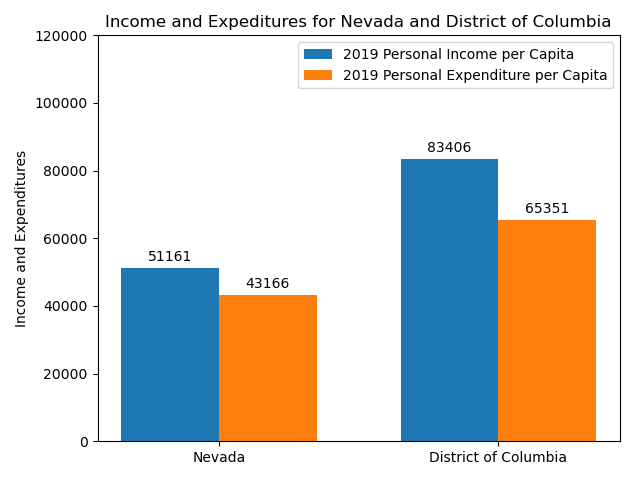

In [39]:

labels = [state_1, state_2]
legend = [f'{year} Personal Income per Capita', f'{year} Personal Expenditure per Capita']
income_per_capita = [state1_income, state2_income]
expenditures_per_capita = [state1_expend, state2_expend]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, income_per_capita, width, label=state_1)
rects2 = ax.bar(x + width/2, expenditures_per_capita, width, label=state_2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Income and Expenditures')
ax.set_title(f'Income and Expeditures for {state_1} and {state_2}')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(legend)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
#ax.legend(legend, bbox_to_anchor=(1, 1), loc='upper left')
#plt.legend(bbox_to_anchor=(1, 1),bbox_transform=plt.gcf().transFigure)
plt.ylim(0,120000)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)
fig.tight_layout()

plt.show()

In [22]:

#line_chart_df

<IPython.core.display.Javascript object>


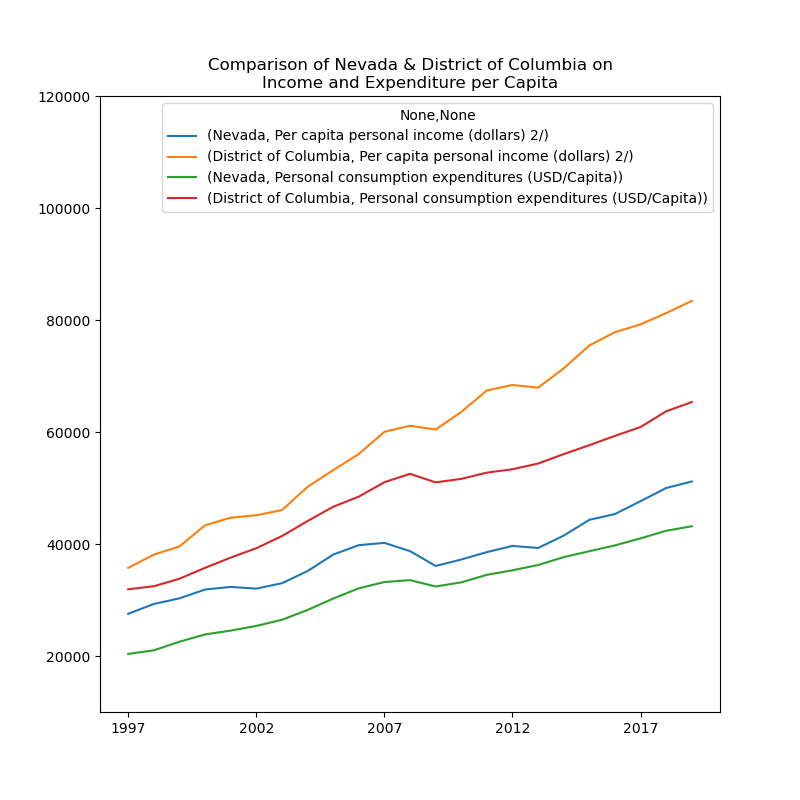

In [40]:
#Compare 2 states on income and Expenditure from 1997 to 2019
#Pull data for state1

state1_income = combined_income_expenditure_df.loc[(state_1, variable_1 )]
state1_expend = combined_income_expenditure_df.loc[(state_1, variable_2 )]

#Pull data for state
state2_income = combined_income_expenditure_df.loc[(state_2, variable_1 )]
state2_expend = combined_income_expenditure_df.loc[(state_2, variable_2 )]
#print(state1_income, state1_expend)
#print(state2_income, state2_expend)
index = list(range(1997,2020))
#line_chart_df = pd.DataFrame([{f'{state_1} Personal Income per Capita':state1_income},\
 #                         {f'{state_2} Personal Income per Capita':state2_income},\
 #                         {f'{state_1} Personal Expenditure per Capita':state1_expend},\
 #                          {f'{state_2} Personal Expenditure per Capita':state2_expend}
 #                      ])
 
line_chart_df = pd.concat([state1_income, state2_income, state1_expend, state2_expend], axis=1)
#line_chart_df.rename(columns={"Per capita personal income (dollars) 2/" :f'{state_1} Personal Income per Capita'})
line_chart_df.plot(kind='line',figsize=(8,8),\
                   title=f'Comparison of {state_1} & {state_2} on\nIncome and Expenditure per Capita',
                  ylim=(10000,120000))
plt.ylabel= "Year"

#plt.ylim =(0,130000)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
plt.show()
#line_chart_df.plot(kind='line')
#fig.savefig("LinePlot.png")
#plt.show()


In [24]:
line_chart_df.rename(columns={"Per capita personal income (dollars) 2/" :f'{state_1} Personal Income per Capita'})

,Nevada,District of Columbia,Nevada,District of Columbia
,Nevada Personal Income per Capita,Nevada Personal Income per Capita,Personal consumption expenditures (USD/Capita),Personal consumption expenditures (USD/Capita)
1997,27534,35739,20375,31918
1998,29291,38097,21014,32454
1999,30292,39563,22544,33796
2000,31871,43344,23853,35743
2001,32340,44695,24538,37572
2002,32030,45136,25368,39251
2003,32996,46047,26467,41413
2004,35163,50201,28218,44090
2005,38103,53186,30251,46648


In [25]:
#x_values = combined_income_expenditure_df.loc[(state_1, variable_1 )].drop(["Code", "LineCode"])
#x_values 

In [32]:
pd.set_option('display.max_colwidth', 1)
pd.DataFrame(combined_income_expenditure_df.index.values).head(28)

,0
0,"(United States, Personal income (millions of dollars))"
1,"(United States, Population (persons) 1/)"
2,"(United States, Per capita personal income (dollars) 2/)"
3,"(United States, Personal consumption expenditures (USD/Capita))"
4,"(United States, Goods (USD/Capita))"
5,"(United States, Durable goods (USD/Capita))"
6,"(United States, Motor vehicles and parts (USD/Capita))"
7,"(United States, Furnishings and durable household equipment (USD/Capita))"
8,"(United States, Recreational goods and vehicles (USD/Capita))"
9,"(United States, Other durable goods (USD/Capita))"


<IPython.core.display.Javascript object>


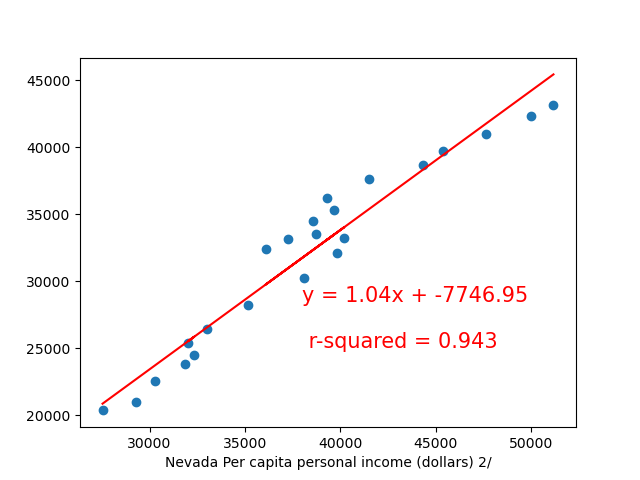

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylabel'

In [41]:
#Scatter plots; What is the correlation of two spending behaviours for each state
plt.figure()

compare_1 = "Per capita personal income (dollars) 2/"
compare_2 = "Personal consumption expenditures (USD/Capita)"
xstate = state_1
ystate = state_1




x_values = np.array(combined_income_expenditure_df.loc[(xstate, compare_1)].values.tolist())
y_values = np.array(combined_income_expenditure_df.loc[(ystate, compare_2)].values.tolist())
savings = x_values - y_values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values =  x_values *slope + intercept

len(y_values)

regress_values = x_values * (slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.show()

plt.plot(x_values,regress_values,"r-")
plt.annotate(f'{line_eq}\n\n r-squared = {round(rvalue**2,3)}'  ,(38000,25000),fontsize=15,color="red")
plt.xlabel(f'{xstate} {compare_1}')
plt.set_ylabel(f'{ystate} {compare_2}')
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [ ]:
#Saving to csv for analysis
combined_income_expenditure_df.to_csv ("..\Analysis_results\Cleaned_income_Expenditure.csv", index = True, header=True)

In [42]:
#Drop United states combined data from dataframe
#Find the mean for states from 1997 to 2019
states_mean_df =combined_income_expenditure_df.drop('United States')
states_mean_df = pd.DataFrame(states_mean_df.mean(axis=1))
states_mean_df = states_mean_df.reset_index(level=['Description'])
states_mean_df.head(10)

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Description,0
State,,
Alabama,Personal income (millions of dollars),1.518132e+05
Alabama,Population (persons) 1/,4.671211e+06
Alabama,Per capita personal income (dollars) 2/,3.225648e+04
Alabama,Personal consumption expenditures (USD/Capita),2.609352e+04
Alabama,Goods (USD/Capita),1.009930e+04
Alabama,Durable goods (USD/Capita),3.198000e+03
Alabama,Motor vehicles and parts (USD/Capita),1.379217e+03
Alabama,Furnishings and durable household equipment (USD/Capita),6.959565e+02
Alabama,Recreational goods and vehicles (USD/Capita),7.175652e+02


In [ ]:
states_mean_df.head()

In [43]:
# Computing the statistical values on Income and Expenditure on all states from 1197 to 2019 on all states for Income pe capita and for Expenditure per capita

mean_df_income = states_mean_df[states_mean_df["Description"] == 'Per capita personal income (dollars) 2/'].rename(columns={0: "Income Per Capita"})
mean_df_expend = states_mean_df[states_mean_df["Description"] == 'Personal consumption expenditures (USD/Capita)'].rename(columns={0: "Expenditure Per Capita"})

sts_income = mean_df_income.aggregate(['mean', 'median', 'var', 'std', 'sem']).astype(int)
sts_expend = mean_df_income.aggregate(['mean', 'median', 'var', 'std', 'sem']).astype(int)

sts_expend = sts_expend.rename(columns={0: "Expenditure Per Capita"})
sts_income = sts_income.rename(columns={0: "Income Per Capita"})

mean_df_income = pd.DataFrame(mean_df_income['Income Per Capita'])
mean_df_expend = pd.DataFrame(mean_df_expend['Expenditure Per Capita'])
mean_df_income.head()

,Income Per Capita
State,
Alabama,32256.478261
Alaska,45101.260870
Arizona,33704.217391
Arkansas,31490.000000
California,44230.652174


In [44]:
 # Calculating quartiles on Income and Expenditure
quartiles_sts_income = mean_df_income["Income Per Capita"].quantile([.25,.5,.75]).T    
quartiles_sts_expend = mean_df_expend["Expenditure Per Capita"].quantile([.25,.5,.75]).T
quartiles_sts_expend

0.25    27873.413043
0.50    31420.391304
0.75    33874.130435
Name: Expenditure Per Capita, dtype: float64

In [45]:
# Retrieving lower and upper quartiles
lowerq_income = quartiles_sts_income[0.25]
upperq_income = quartiles_sts_income[0.75]
iqr_income = upperq_income-lowerq_income
lower_bound_income = lowerq_income - (1.5*iqr_income)
upper_bound_income = upperq_income + (1.5*iqr_income)

lowerq_expend = quartiles_sts_expend[0.25]
upperq_expend = quartiles_sts_expend[0.75]
iqr_expend = upperq_expend-lowerq_expend
lower_bound_expend = lowerq_expend - (1.5*iqr_expend)
upper_bound_expend = upperq_expend + (1.5*iqr_expend)
lowerq_expend

27873.413043478264

In [46]:
#mean_df_income
list(mean_df_income.index.values)
#mean_df_income["Income Per Capita"].loc['Alaska']
#upper_bound_income
#mean_df_income.index.values
#pd.DataFrame(outliers_income)

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

2 States are potential outliers in terms of Income Per Capita from 1997 to 2019 as listed:
                      Income Per Capita
Connecticut           56730.652174     
District of Columbia  59543.739130     
------------
------------
1 States are potential outliers in terms of Expenditure Per Capita from 1997 to 2019 as listed:
                      Expenditure Per Capita
District of Columbia  48737.478261          


<IPython.core.display.Javascript object>


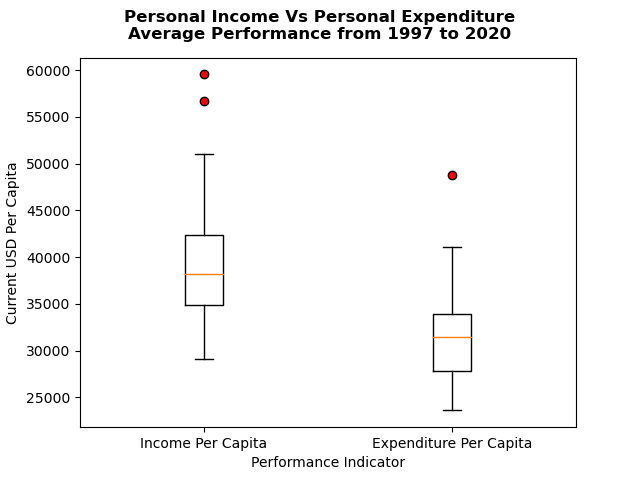

In [47]:
#finding Outlier States between 1997 to 2019 on Income Per Capita
outliers_income = [mean_df_income.loc[index] for index in list(mean_df_income.index.values) if mean_df_income["Income Per Capita"].loc[index] < lower_bound_income or mean_df_income["Income Per Capita"].loc[index] > upper_bound_income]
print(f'{len(outliers_income)} States are potential outliers in terms of Income Per Capita from 1997 to 2019 as listed:\n{pd.DataFrame(outliers_income)}')
print("------------\n------------")
outliers_expend = [mean_df_expend.loc[index] for index in list(mean_df_expend.index.values) if mean_df_expend["Expenditure Per Capita"].loc[index] < lower_bound_expend or mean_df_expend["Expenditure Per Capita"].loc[index] > upper_bound_expend]
print(f'{len(outliers_expend)} States are potential outliers in terms of Expenditure Per Capita from 1997 to 2019 as listed:\n{pd.DataFrame(outliers_expend)}')

#list(mean_df_expend["Expenditure Per Capita"])

income_list = list(mean_df_income["Income Per Capita"])
expend_list = list(mean_df_expend["Expenditure Per Capita"])
indicators = ["Income Per Capita", "Expenditure Per Capita"]
fig, (ax1) = plt.subplots()
fig.suptitle("Personal Income Vs Personal Expenditure\nAverage Performance from 1997 to 2020", fontsize=12, fontweight="bold")
ax1.boxplot(x = [income_list, expend_list],   flierprops=dict(markerfacecolor='r'))
ax1.set_ylabel("Current USD Per Capita")
ax1.set_xlabel("Performance Indicator")
plt.xticks([1, 2], indicators)
plt.show()